#Basic Section

In [1]:
import spacy


nlp = spacy.load('en_core_web_sm')

sentence = "The quick brown fox jumps over the lazy dog."

doc = nlp(sentence)

for ent in doc.ents:
	print(ent.text, ent.start_char, ent.end_char, ent.label_)



def lemmatize_text(text):
    doc = nlp(text)
    lemmatized_text = " ".join([token.lemma_ for token in doc])
    return lemmatized_text

def remove_stopwords(text):
    doc = nlp(text)
    filtered_text = " ".join([token.text for token in doc if not token.is_stop])
    return filtered_text

text = "I am running in the park with my dogs and feeling happy."

lemmatized_text = lemmatize_text(text)
print(lemmatized_text)

filtered_text = remove_stopwords(text)
print(filtered_text)

I be run in the park with my dog and feel happy .
running park dogs feeling happy .


In [ ]:
#Intermediate Section

In [3]:
import pandas as pd

training_df = pd.read_csv('C:/Users/zaineb/Downloads/learn-ai-bbc/BBC News Train.csv')
test_df = pd.read_csv('C:/Users/zaineb/Downloads/learn-ai-bbc/BBC News Test.csv')
sample_df = pd.read_csv('C:/Users/zaineb/Downloads/learn-ai-bbc/BBC News Sample Solution.csv')

In [4]:
print('Training data shape: ', training_df.shape)
print('Test data shape: ', test_df.shape)
print('Sample data shape: ', sample_df.shape)

Training data shape:  (1490, 3)
Test data shape:  (735, 2)
Sample data shape:  (735, 2)


In [5]:
print(training_df.head())

   ArticleId                                               Text  Category
0       1833  worldcom ex-boss launches defence lawyers defe...  business
1        154  german business confidence slides german busin...  business
2       1101  bbc poll indicates economic gloom citizens in ...  business
3       1976  lifestyle  governs mobile choice  faster  bett...      tech
4        917  enron bosses in $168m payout eighteen former e...  business


In [6]:
import spacy
nlp = spacy.load("en_core_web_sm")

# define a function to preprocess the text data
def preprocess(text):
    # remove all stop words and punctuations, lemmatize the words, lowercase all the words
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    # remove all numbers and words with length less than 3
    tokens = [token for token in tokens if not token.isdigit() and len(token) > 2]
    return " ".join(tokens)

# apply the preprocessing function to the 'text' column of the bbc-news dataset
training_df['Clean Text'] = training_df['Text'].apply(preprocess)

# display the first five rows of the preprocessed dataset
print(training_df.head())

   ArticleId                                               Text  Category  \
0       1833  worldcom ex-boss launches defence lawyers defe...  business   
1        154  german business confidence slides german busin...  business   
2       1101  bbc poll indicates economic gloom citizens in ...  business   
3       1976  lifestyle  governs mobile choice  faster  bett...      tech   
4        917  enron bosses in $168m payout eighteen former e...  business   

                                          Clean Text  
0  worldcom boss launch defence lawyer defend wor...  
1  german business confidence slide german busine...  
2  bbc poll indicate economic gloom citizen major...  
3  lifestyle govern mobile choice fast well funky...  
4  enron boss payout eighteen enron director agre...  


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(training_df['Text'], training_df['Category'], test_size=0.2, random_state=42)

# use TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# use the Logistic Regression classifier
classifier = LogisticRegression()
classifier.fit(X_train_tfidf, y_train)

# report the accuracy of the model on the testing set
accuracy = classifier.score(X_test_tfidf, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9664429530201343


In [ ]:
#Advanced Section

In [9]:
import pandas as pd

data = pd.read_csv('C:/Users/zaineb/Desktop/Test/tweets-sentiment-dataset.csv',encoding = "latin",header=None)
data = data.iloc[:,[5,0]]
data.columns = ['Text','Class']
data = data.sample(102000)
data.reset_index(drop=True,inplace=True)
data.head(10)

,Text,Class
0,@spitphyre just read your comment nice. And ...,4
1,I don't know man.... He always there when I ne...,4
2,got her engagement session pics back from the ...,4
3,@bet33 i ask my dad he said no but ill go see...,0
4,I wanna go see The Breakup,0
5,Hey girls! Im out of school... Finished my fin...,4
6,i am getting ready to do my monthly report... ...,4
7,"@lifes_beauty:haha, hes alright...shes about t...",0
8,@SoulByDzyne we'll bring itchext two!!! Lol.,0
9,@justineville it's easy to look up new bands. ...,4


In [10]:
import spacy
# Load the Spacy English model
nlp = spacy.load('en_core_web_sm')

# Define a function to preprocess the text
def preprocess_text(text):
    doc = nlp(text)
    tokens = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.like_num and len(token) >= 3]
    return ' '.join(tokens)

# Preprocess the text column
data['text_processed'] = data['Text'].apply(preprocess_text)

In [11]:
data.head(10)


,Text,Class,text_processed
0,@spitphyre just read your comment nice. And ...,4,@spitphyre read comment nice comment
1,I don't know man.... He always there when I ne...,4,know man need day get well
2,got her engagement session pics back from the ...,4,get engagement session pic photographer love
3,@bet33 i ask my dad he said no but ill go see...,0,@bet33 ask dad say ill house instead jaja
4,I wanna go see The Breakup,0,wanna breakup
5,Hey girls! Im out of school... Finished my fin...,4,hey girl school finish final today go twitter ...
6,i am getting ready to do my monthly report... ...,4,get ready monthly report handlin business
7,"@lifes_beauty:haha, hes alright...shes about t...",0,@lifes_beauty haha alright she bath leave
8,@SoulByDzyne we'll bring itchext two!!! Lol.,0,@soulbydzyne bring itchext lol
9,@justineville it's easy to look up new bands. ...,4,@justineville easy look new band want teach


In [12]:
data.isna().sum()

Text              0
Class             0
text_processed    0
dtype: int64

In [13]:
data.loc[data['Class']==4,'Class'] = 1
data['Class'].value_counts()

1    51013
0    50987
Name: Class, dtype: int64

Accuracy: 0.7311274509803921
Precision: 0.7319108638224192
Recall: 0.7311274509803921
F1 score: 0.7308039029407795


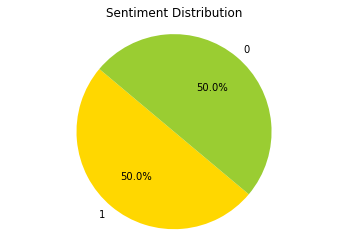

In [15]:
import spacy
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text_processed'], data['Class'], test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train the Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 score:", f1)

# Visualize the distribution of sentiment labels in the dataset using a pie chart
labels = data['Class'].value_counts().index.tolist()
sizes = data['Class'].value_counts().values.tolist()
colors = ['gold', 'yellowgreen', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Sentiment Distribution')
plt.show()
